## Install required packages

In [1]:
import os
import cv2
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import skimage
import glob
import utils
import visualize
from visualize import display_images
import model as modellib
from model import log

import cuy

# Root directory of the project
ROOT_DIR = os.getcwd()
#ROOT_DIR = '/root/Mask_RCNN/'

Using TensorFlow backend.


In [2]:
ROOT_DIR

'C:\\Users\\Yeshica\\Documents\\GitHub\\Weight-Mask-R-CNN'

In [18]:
#custom_WEIGHTS_PATH = 'C:\\Users\\Lenovo\\Documents\\GitHub\\mask_rcnn_cuy_0048.h5'
#file_BODYWEIGHT_PATH = 'C:\\Users\\Lenovo\\Documents\\GitHub\\dataset\\cuy_weights.txt'
custom_WEIGHTS_PATH = 'C:\\Users\\Yeshica\\Documents\\GitHub\\weight_mask_rcnn_cuy_0050.h5'
file_BODYWEIGHT_PATH = 'C:\\Users\\Yeshica\\Documents\\GitHub\\dataset_original\\cuy_bw.txt'

In [19]:
%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

config = cuy.CuyConfig()
#custom_DIR = os.path.join(ROOT_DIR, "dataset/cuy")
custom_DIR = "C:\\Users\\Yeshica\\Documents\\GitHub\\dataset_original"

class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()

# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax
  
# Load validation dataset
dataset = cuy.CuyDataset()
dataset.load_dataset(custom_DIR, "val", file_BODYWEIGHT_PATH)

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

# load the last model you trained
# weights_path = model.find_last()[1]

# Load weights
print("Loading weights ", custom_WEIGHTS_PATH)
model.load_weights(custom_WEIGHTS_PATH, by_name=True)

from importlib import reload # was constantly changin the visualization, so I decided to reload it instead of notebook
reload(visualize)


Configurations Superlee:
BACKBONE                       resnet50
BACKBONE_SHAPES                [[160 160]
 [ 80  80]
 [ 40  40]
 [ 20  20]
 [ 10  10]]
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
DETECTION_MAX_INSTANCES        10
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
EPOCHS                         50
GPU_COUNT                      1
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  640
IMAGE_MIN_DIM                  640
IMAGE_PADDING                  True
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [640 640   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
MASK_POOL_SIZE                 14
MASK_SHAPE                     [56, 56]
MAX_GT_INSTANCES               50
MEAN_PIXEL                     [123.7 116.8 103.9]
MINI_MASK_SHAPE                (56, 56)
NAME                           cuy
NUM_CLASSES     

<module 'visualize' from 'C:\\Users\\Yeshica\\Documents\\GitHub\\Weight-Mask-R-CNN\\visualize.py'>

image ID: dataset.IMG_20210811_100302_augm_0 (1112) 716.5893927663674
rois                     shape: (1, 4)                min:  135.00000  max:  558.00000
class_ids                shape: (1,)                  min:    1.00000  max:    1.00000
bodyweight               shape: (1, 1)                min:  834.96942  max:  834.96942
masks                    shape: (640, 640, 1)         min:    0.00000  max:    1.00000
[[834.9694]]
1
1


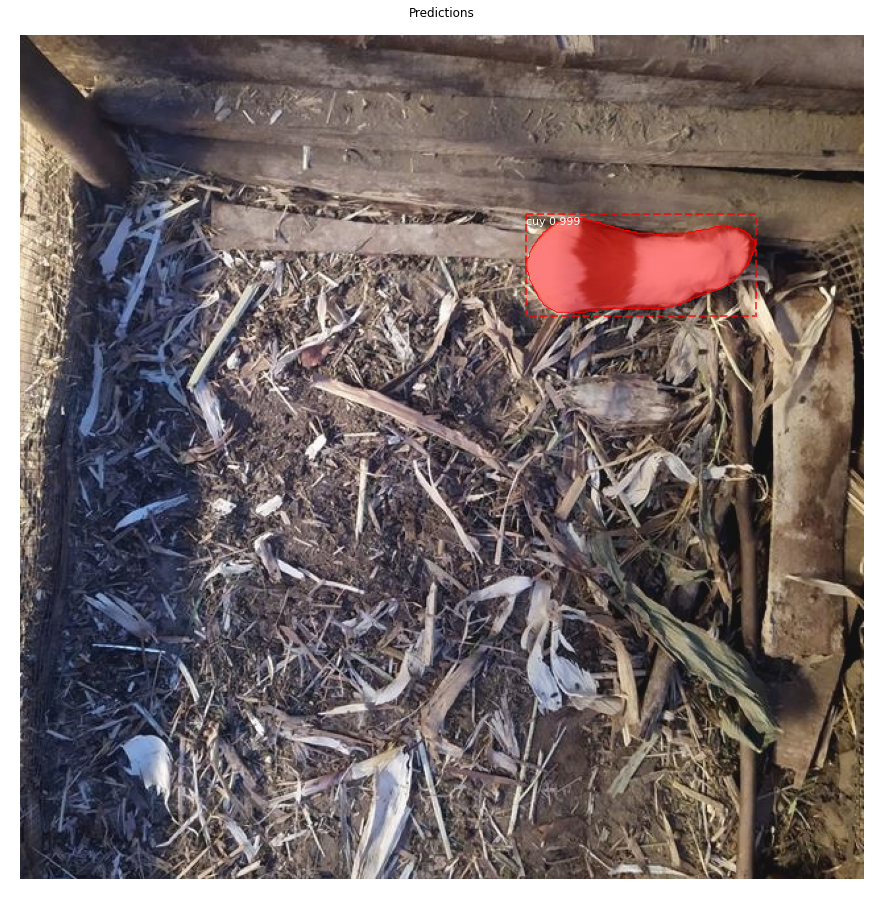

In [13]:
image_id = random.choice(dataset.image_ids)

image, image_meta, gt_class_id, gt_bbox, gt_mask, gt_weight =\
          modellib.load_image_gt_keypoints(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, info['weight']))

# Run object detection
results = model.detect_bodyweight([image], verbose=0)

#log("gt_class_id", gt_class_id)
#log("gt_bbox", gt_bbox)
#log("gt_mask", gt_mask)
#log("gt_bodyweight", gt_weight)


    # Display results
ax = get_ax(1)
r = results[0]

log("rois",r['rois'])
log("class_ids",r['class_ids'])
log("bodyweight",r['bodyweight'])
log("masks",r['masks'])
print(r['bodyweight'])
print(np.size(r['bodyweight']))
visualize.display_instances_bw(image, r['rois'], r['masks'] ,r['bodyweight'], r['class_ids'], 
                              dataset.class_names, r['scores'], ax=ax,
                              title="Predictions")


In [13]:
for image_id in dataset.image_ids:
    print(image_id)
    image, image_meta, gt_class_id, gt_bbox, gt_mask, gt_weight =\
          modellib.load_image_gt_keypoints(dataset, config, image_id, use_mini_mask=False)
    info = dataset.image_info[image_id]
    print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, info['weight']))
    # Run object detection
    results = model.detect_bodyweight([image], verbose=0)
    r = results[0]
    #print(r['rois'])
    print(r['bodyweight'])
#image_id = random.choice(dataset.image_ids)

#image, image_meta, gt_class_id, gt_bbox, gt_mask, gt_weight =\
#          modellib.load_image_gt_keypoints(dataset, config, image_id, use_mini_mask=False)
#info = dataset.image_info[image_id]
#print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, info['weight']))

# Run object detection
#results = model.detect_bodyweight([image], verbose=0)

#log("gt_class_id", gt_class_id)
#log("gt_bbox", gt_bbox)
#log("gt_mask", gt_mask)
#log("gt_bodyweight", gt_weight)


    # Display results
#ax = get_ax(1)
#r = results[0]

#log("rois",r['rois'])
#log("class_ids",r['class_ids'])
#log("bodyweight",r['bodyweight'])
#log("masks",r['masks'])
#print(r['bodyweight'])
#visualize.display_instances_bw(image, r['rois'], r['masks'] ,r['bodyweight'], r['class_ids'], 
#                              dataset.class_names, r['scores'], ax=ax,
#                              title="Predictions")


0
image ID: dataset.IMG_20210607_092234 (0) 1482.0
[[443  21 538 217]]
[[1132.6675]]
1
image ID: dataset.IMG_20210607_092619 (1) 1217.0


ValueError: could not broadcast input array from shape (218,218) into shape (218,173)

In [20]:
#from sklearn.metrics import mean_squared_error
y_true, y_pred = [] , []
for image_id in dataset.image_ids:
    #print(image_id)
    image, image_meta, gt_class_id, gt_bbox, gt_mask, gt_weight =\
          modellib.load_image_gt_keypoints(dataset, config, image_id, use_mini_mask=False)
    info = dataset.image_info[image_id]
    #print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, info['weight']))
    # Run object detection
    results = model.detect_bodyweight([image], verbose=0)
    r = results[0]
    if(np.size(r['bodyweight']) == 1):
        y_true.append(info['weight'])
        y_pred.append(r['bodyweight'][0][0])
    #print(r['bodyweight'])


In [21]:
from sklearn.metrics import r2_score
y_true_array = np.array(y_true)
y_pred_array = np.array(y_pred)
mse = (np.square(abs(y_true_array - y_pred_array))).mean()
rmse = np.sqrt(mse)
r2 = r2_score(y_true_array, y_pred_array)
print('MSE: %s' % mse)
print('RMSE: %s' % rmse)
print('R2: %s' % r2)

MSE: 34068.51423179091
RMSE: 184.57658094078704
R2: 0.6897828079001117


In [16]:
len(y_true_array)

1246

image ID: dataset.DSC_0301 (0) C:\Users\Lenovo\Documents\GitHub\Keypoints-of-humanpose-with-Mask-R-CNN\dataset/cuy\val\DSC_0301.jpg
Processing 1 images
image                    shape: (640, 640, 3)         min:    0.00000  max:  255.00000
molded_images            shape: (1, 640, 640, 3)      min: -121.70000  max:  131.30000
image_metas              shape: (1, 10)               min:    0.00000  max:  640.00000
windows                  shape: (1, 4)                min:    0.00000  max:  640.00000
rpn_class                shape: (1, 102300, 2)        min:    0.00000  max:    1.00000
rpn_bbox                 shape: (1, 102300, 4)        min:   -6.11731  max:  111.64629
rois                     shape: (1, 1000, 4)          min:    0.00000  max:    1.00000
mrcnn_class              shape: (1, 1000, 2)          min:    0.00000  max:    1.00000
mrcnn_bbox               shape: (1, 1000, 2, 4)       min:   -4.16871  max:    3.20741
detections               shape: (1, 10, 6)            min:    0.0

rpn_class                shape: (1, 102300, 2)        min:    0.00000  max:    1.00000
rpn_bbox                 shape: (1, 102300, 4)        min:   -7.50640  max:  112.01668
rois                     shape: (1, 1000, 4)          min:    0.00000  max:    1.00000
mrcnn_class              shape: (1, 1000, 2)          min:    0.00000  max:    1.00000
mrcnn_bbox               shape: (1, 1000, 2, 4)       min:   -4.99257  max:    2.85136
detections               shape: (1, 10, 6)            min:    0.00000  max:  599.00000
mrcnn_mask               shape: (1, 10, 56, 56, 2)    min:    0.00000  max:    1.00000
mrcnn_bodyweight         shape: (1, 1000, 2)          min:   -2.08875  max:    3.27141
gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000
gt_bbox                  shape: (1, 4)                min:   37.00000  max:  588.00000
gt_mask                  shape: (640, 640, 1)         min:    0.00000  max:    1.00000
gt_bodyweight            shape: (1,)       

rpn_class                shape: (1, 102300, 2)        min:    0.00000  max:    1.00000
rpn_bbox                 shape: (1, 102300, 4)        min:   -7.29946  max:  104.53514
rois                     shape: (1, 1000, 4)          min:    0.00000  max:    1.00000
mrcnn_class              shape: (1, 1000, 2)          min:    0.00000  max:    1.00000
mrcnn_bbox               shape: (1, 1000, 2, 4)       min:   -5.25294  max:    3.07656
detections               shape: (1, 10, 6)            min:    0.00000  max:  377.00000
mrcnn_mask               shape: (1, 10, 56, 56, 2)    min:    0.00018  max:    1.00000
mrcnn_bodyweight         shape: (1, 1000, 2)          min:   -1.55938  max:    3.30475
gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000
gt_bbox                  shape: (1, 4)                min:   24.00000  max:  382.00000
gt_mask                  shape: (640, 640, 1)         min:    0.00000  max:    1.00000
gt_bodyweight            shape: (1,)       

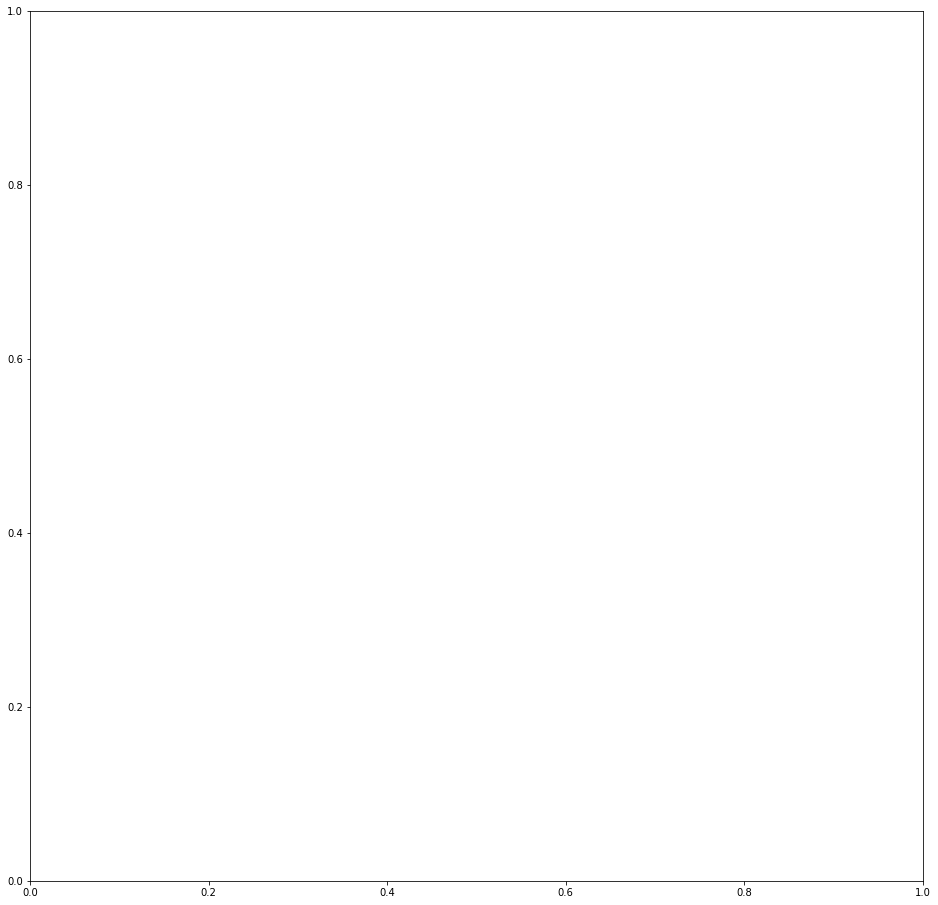

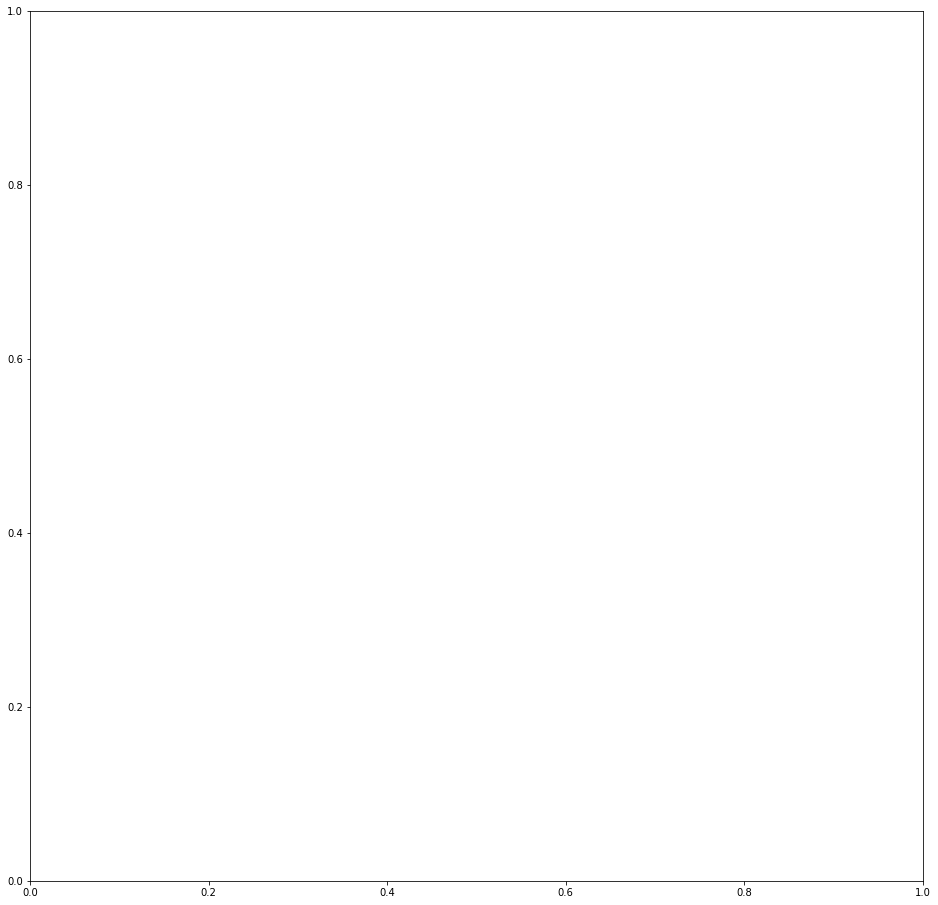

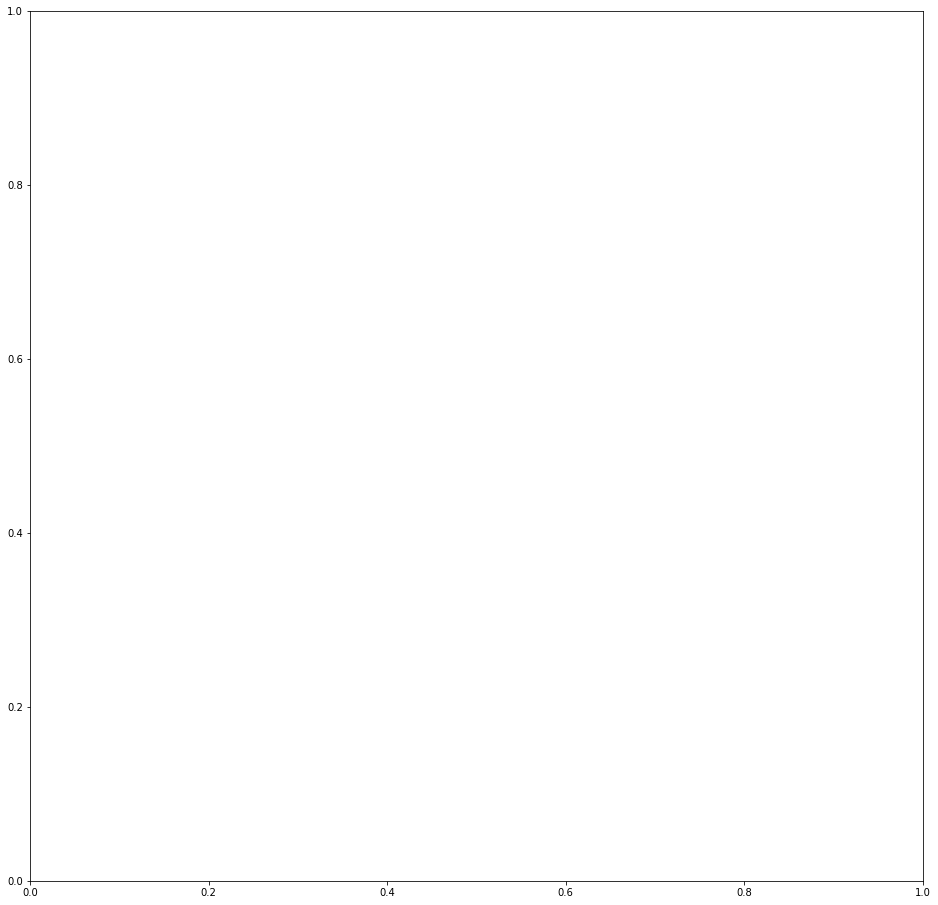

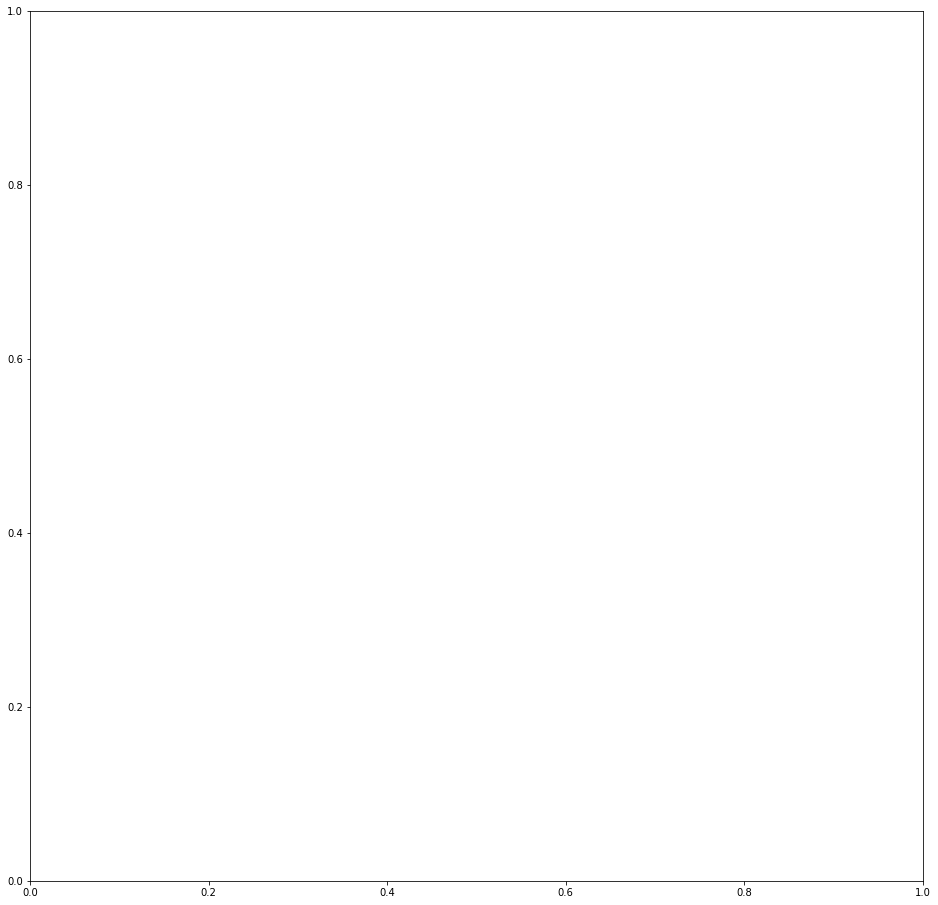

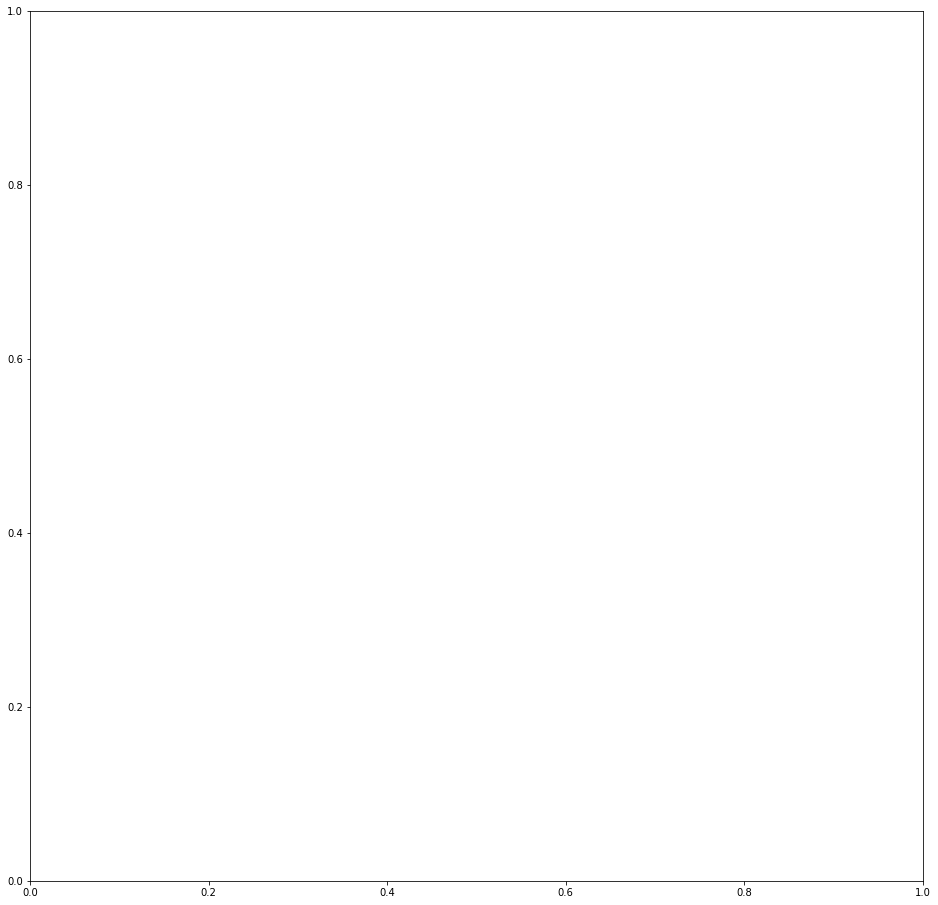

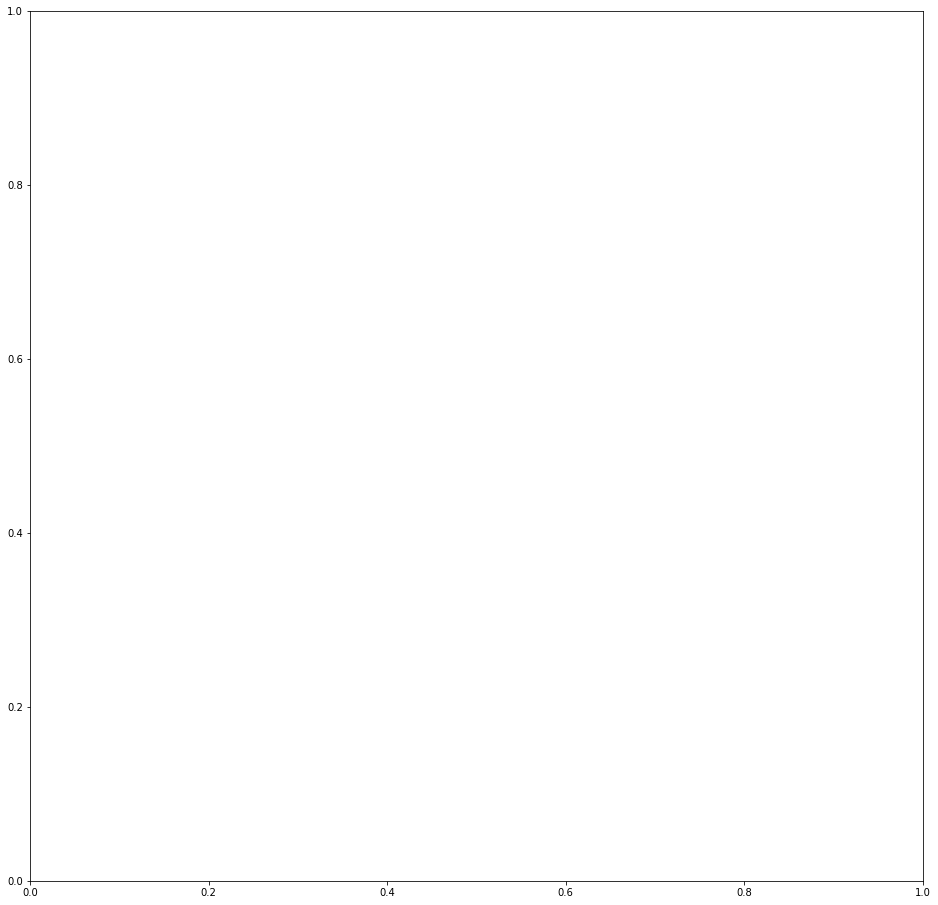

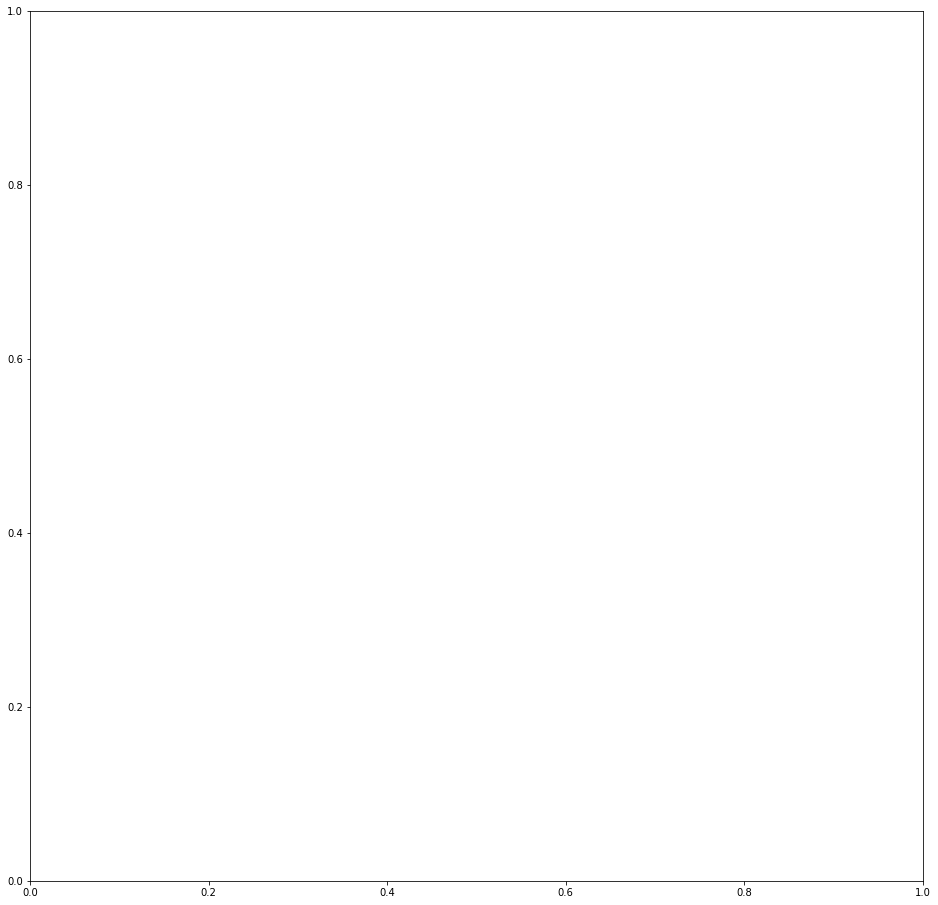

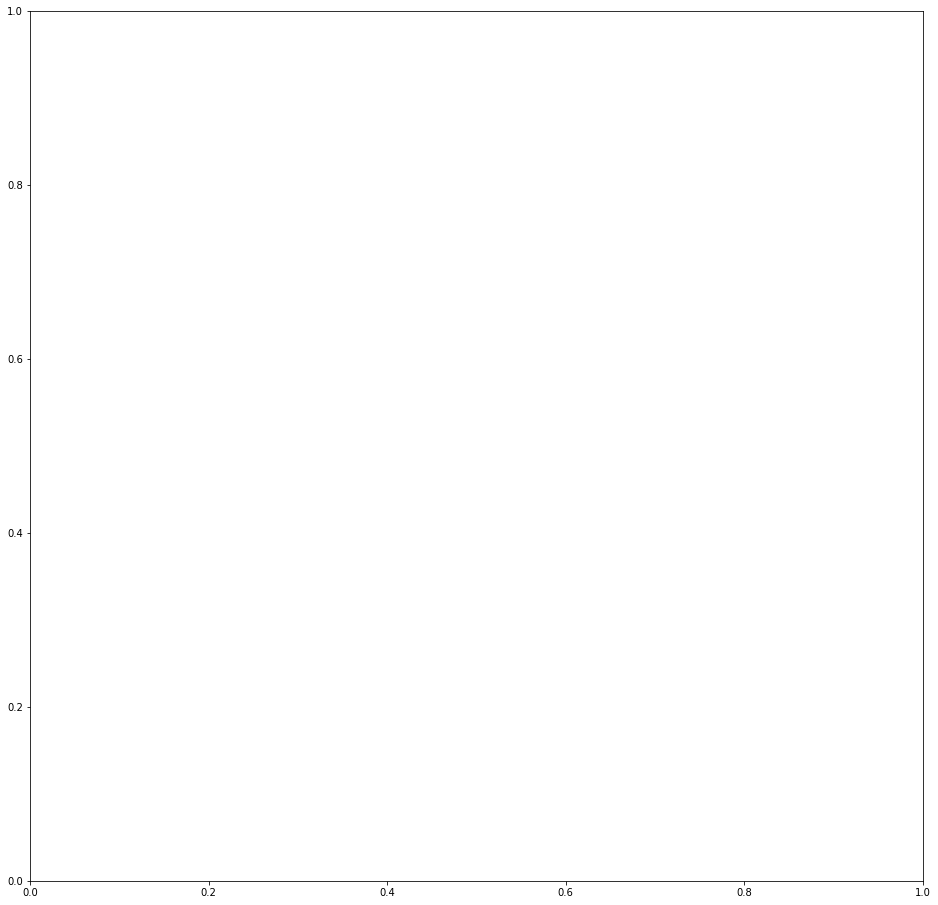

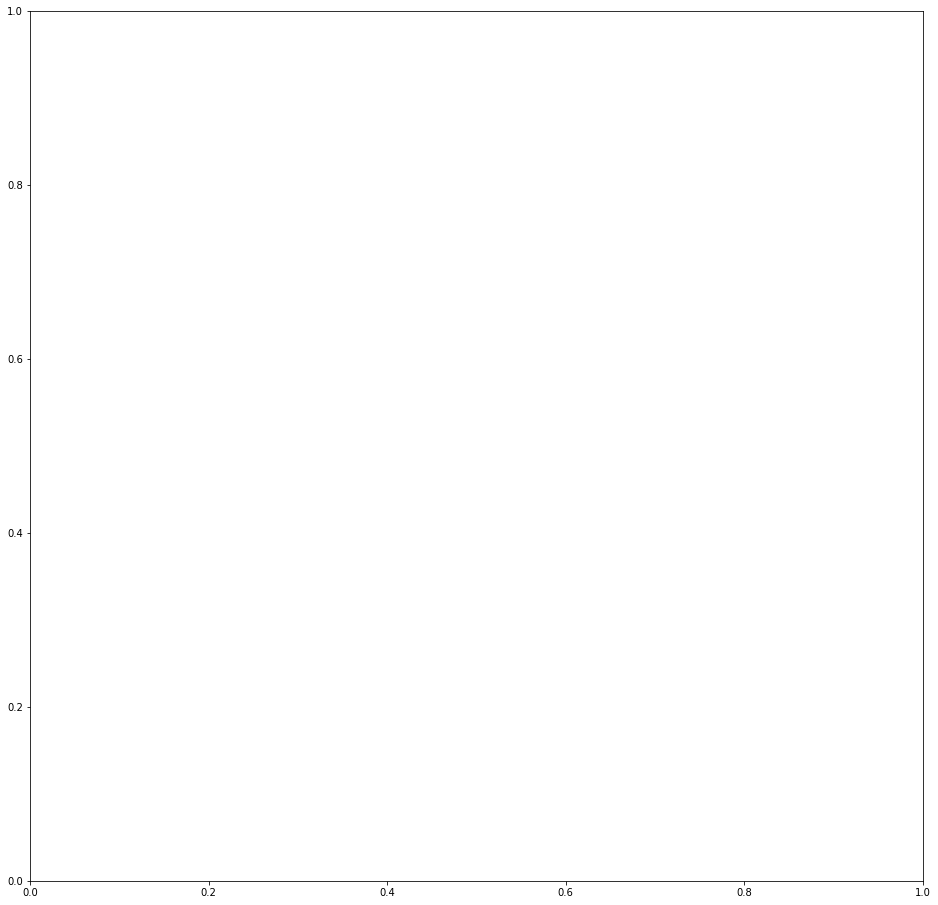

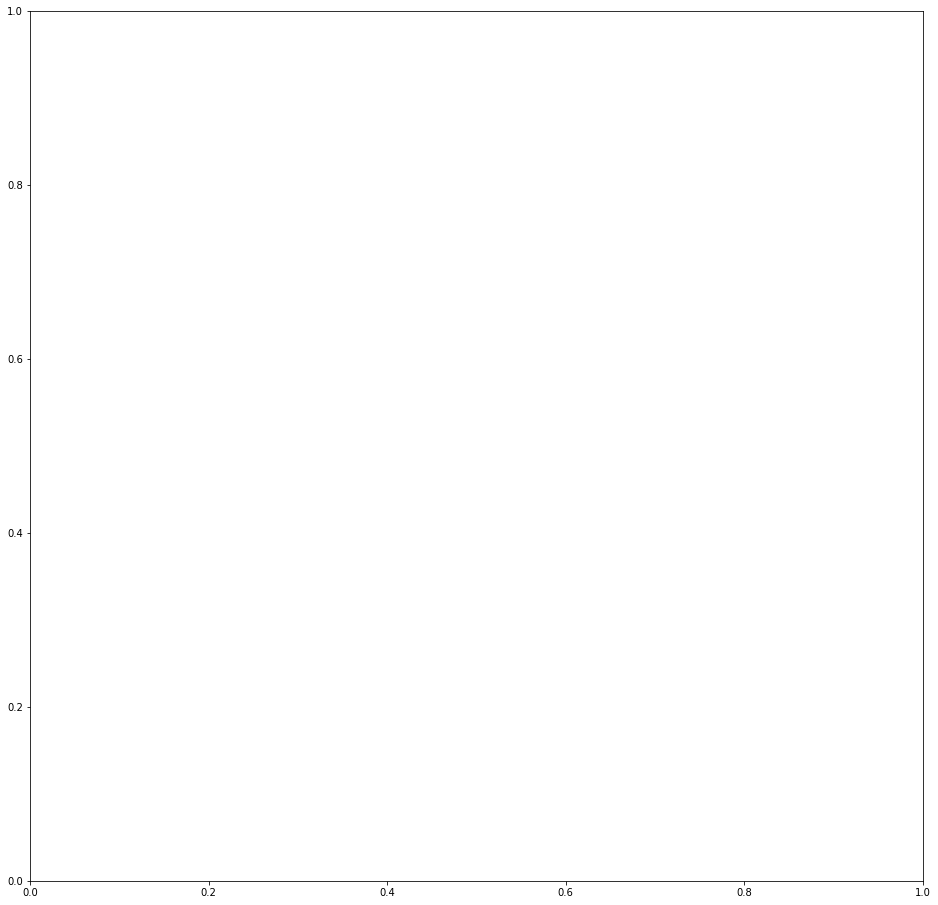

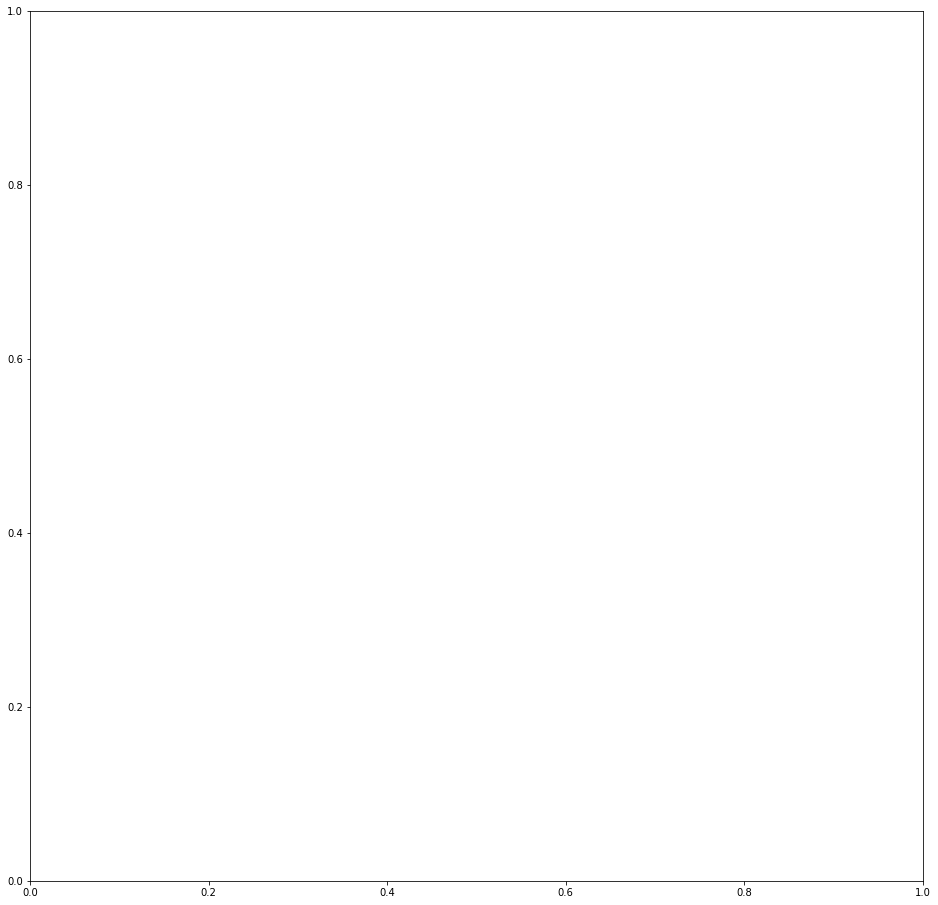

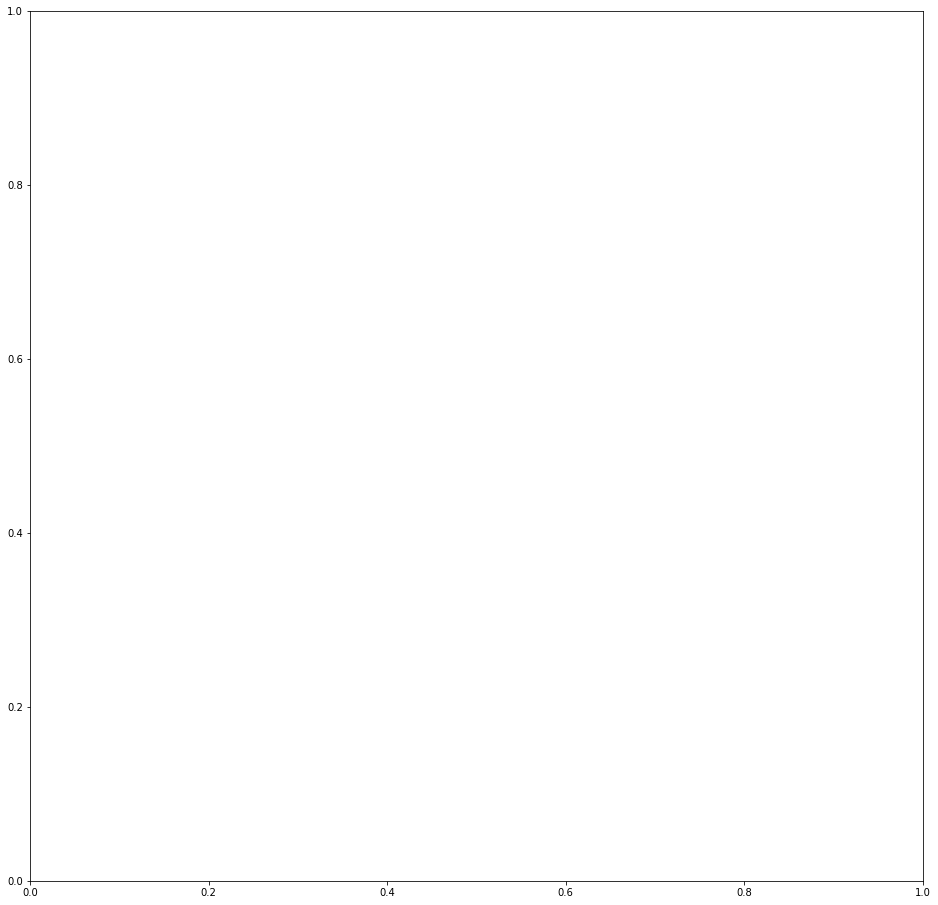

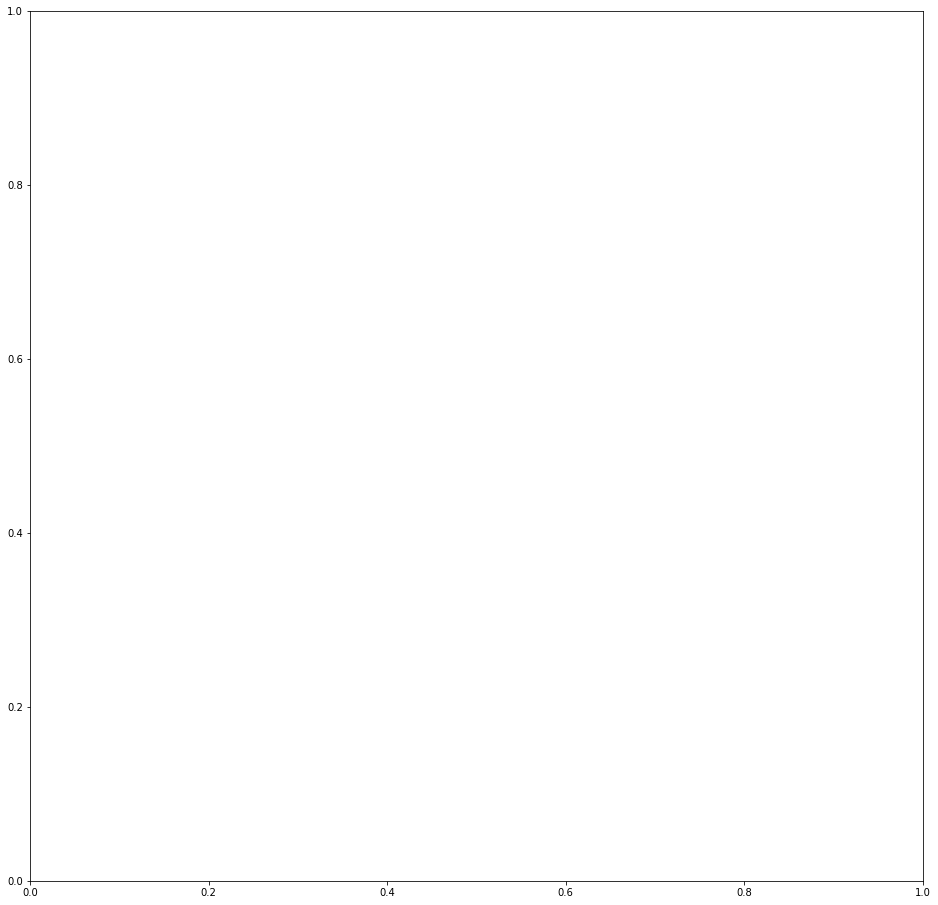

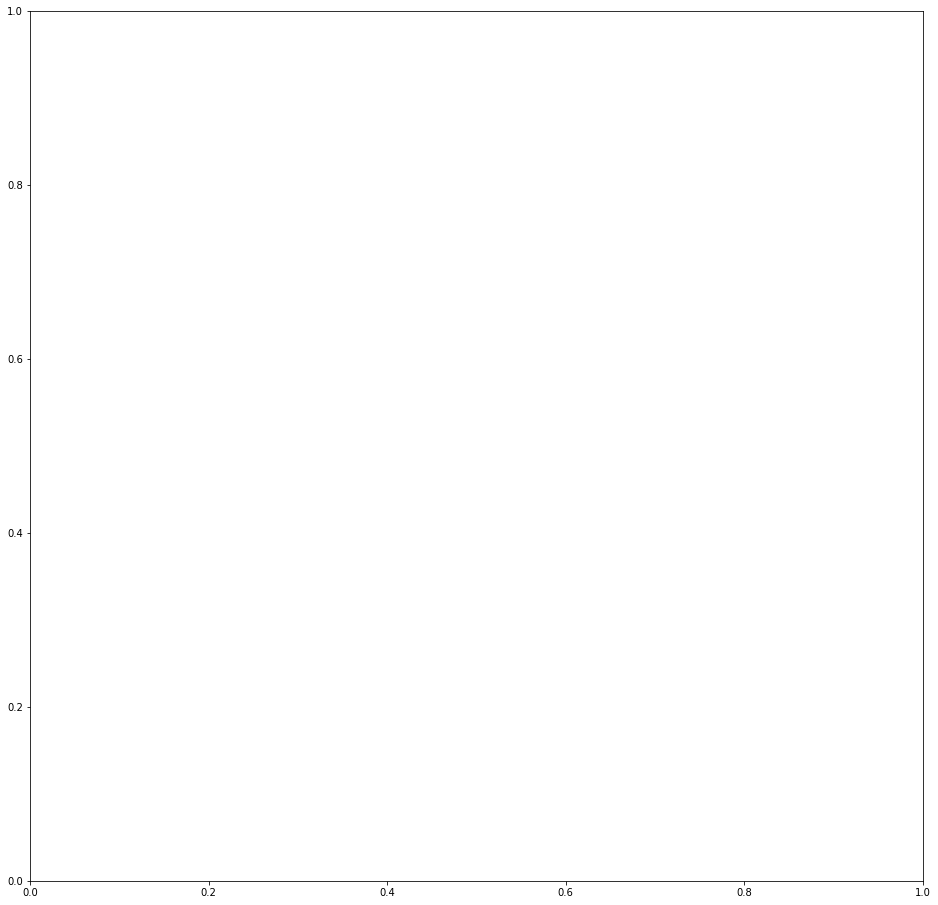

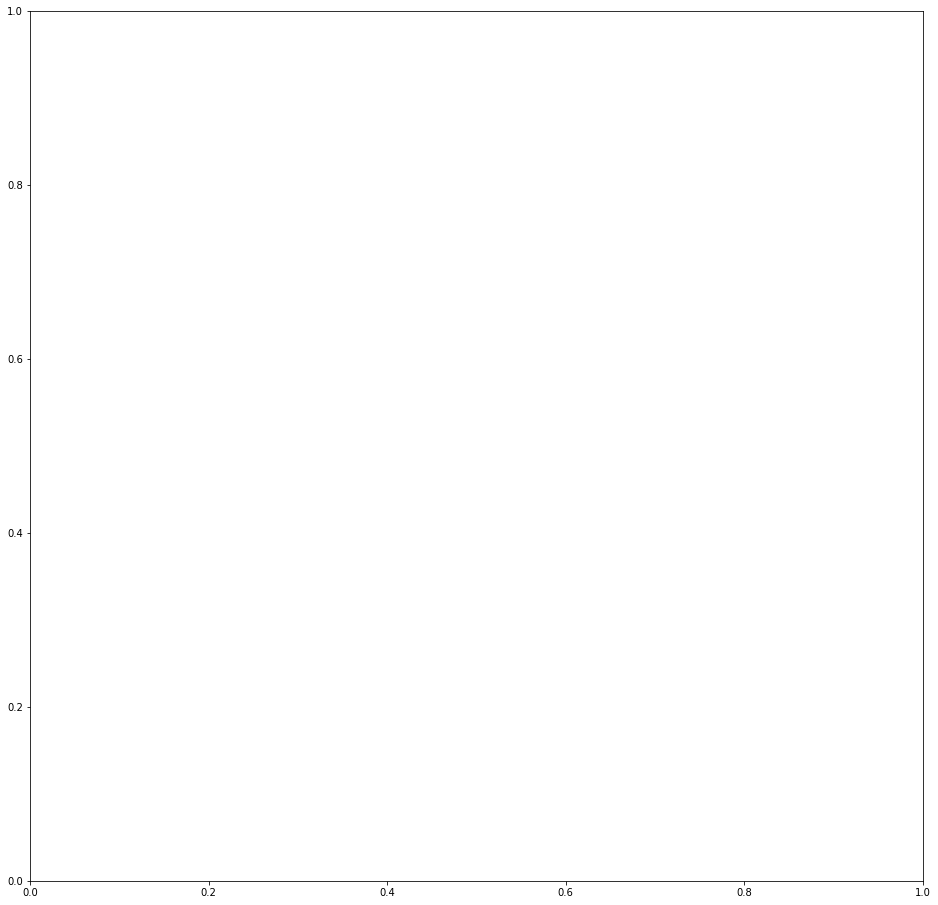

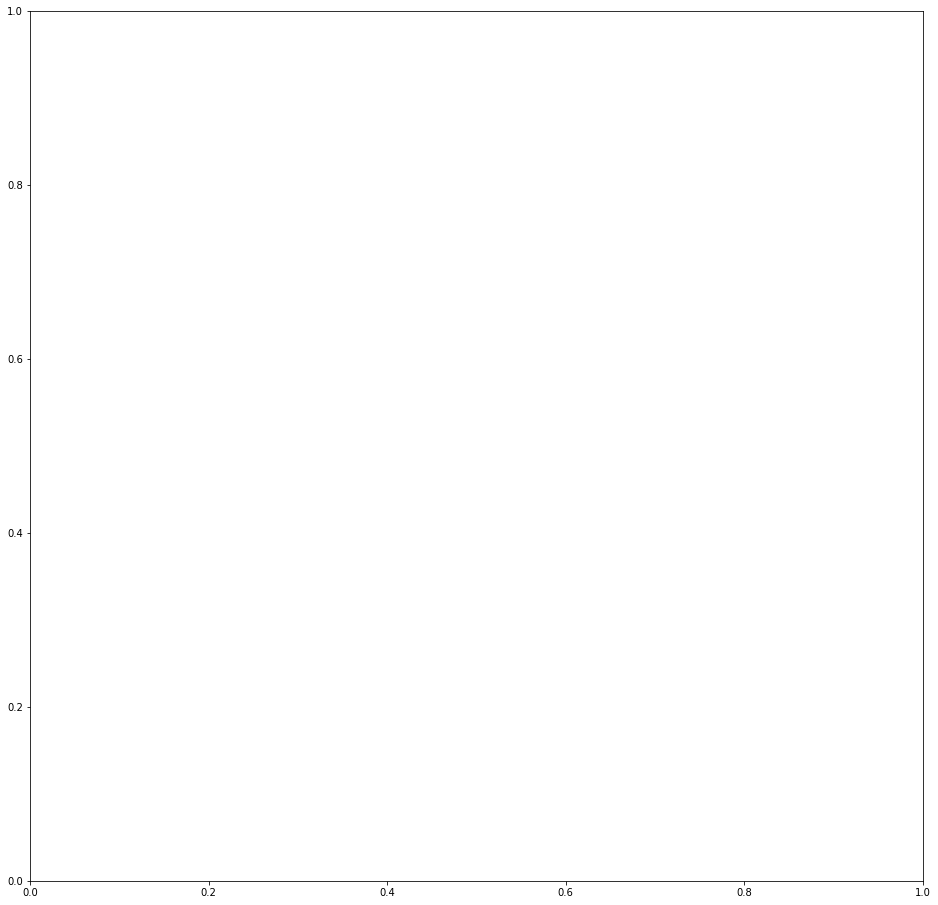

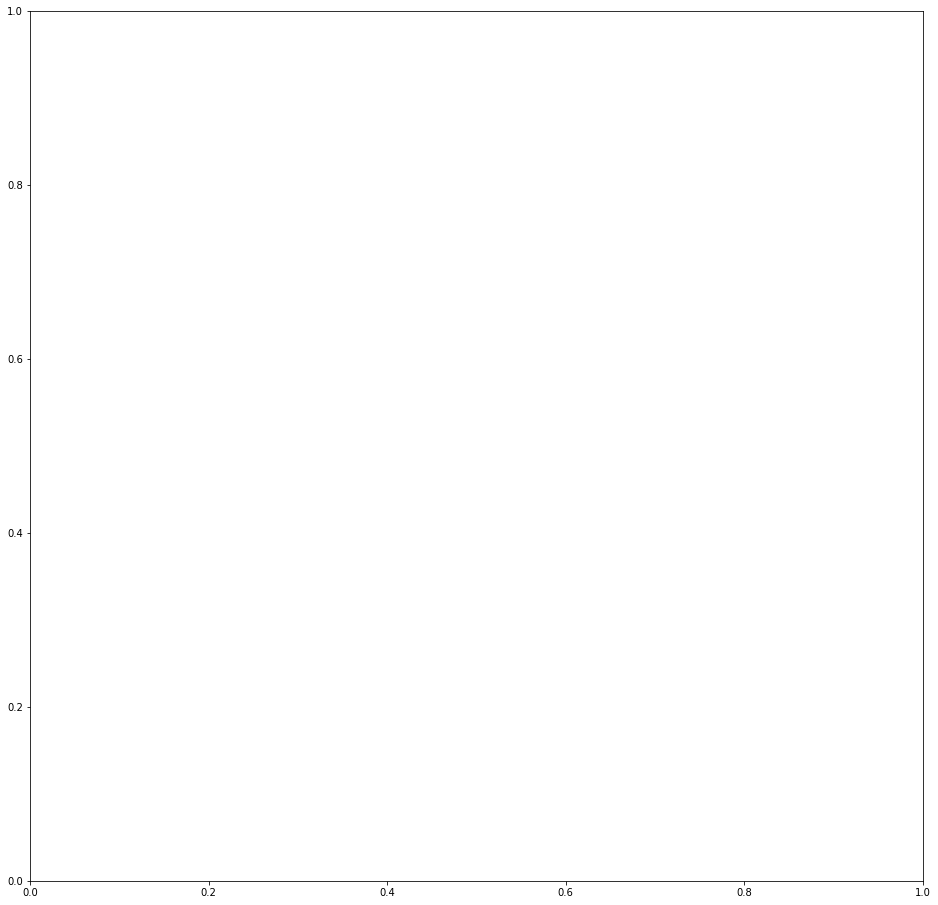

In [5]:

#image_id = random.choice(dataset.image_ids)
for image_id in dataset.image_ids:
    image, image_meta, gt_class_id, gt_bbox, gt_mask, gt_weight =\
          modellib.load_image_gt_keypoints(dataset, config, image_id, use_mini_mask=False)
    info = dataset.image_info[image_id]
    print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                         dataset.image_reference(image_id)))

    # Run object detection
    results = model.detect_keypoint([image], verbose=1)

    # Display results
    ax = get_ax(1)
    r = results[0]
    #visualize.display_instances_bw(image, r['rois'], r['masks'], r['bodyweight'] ,r['class_ids'], 
    #                          dataset.class_names, r['scores'], ax=ax,
    #                          title="Predictions")
    log("gt_class_id", gt_class_id)
    log("gt_bbox", gt_bbox)
    log("gt_mask", gt_mask)
    log("gt_bodyweight", gt_weight)


In [7]:
r['bodyweight'].shape

(1, 2)

In [ ]:
# Test on a random image
image_id = random.choice(val_dataset_keypoints.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask, gt_keypoint =\
    modellib.load_image_gt_keypoints(val_dataset_keypoints, inference_config, 
                           image_id, augment=False,use_mini_mask=inference_config.USE_MINI_MASK)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)
log("gt_keypoint", gt_keypoint)

log("rois",r['rois'])
log("keypoints",r['keypoints'])
log("class_ids",r['class_ids'])
log("keypoints",r['keypoints'])
log("masks",r['masks'])
visualize.display_keypoints(original_image,gt_bbox,gt_keypoint,gt_class_id,val_dataset_keypoints.class_names，skeleton = inference_config.LIMBS)
if(inference_config.USE_MINI_MASK):
    gt_mask = utils.expand_mask(gt_bbox,gt_mask,original_image.shape)
visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            val_dataset_keypoints.class_names,)